In [1]:
import pickle
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
with open('../../Downloads/to_save_personalized_523_tpl4rnf.pkl','rb') as f:
    personalized = pickle.load(f)

In [20]:
with open('../../Downloads/cases_to_plot_base_523_tdpl4r_38.pkl','rb') as f:
    pooled = pickle.load(f)

In [21]:
with open('../../Downloads/cases_to_plot_base_523_tdpl4r_more_random.pkl','rb') as f:
    pooledr = pickle.load(f)

In [3]:
##within study variance
#sum_k=1^K(n_k * (\bar{x}_k - \bar{x})^2)
#where \bar{x}_k is the average regret in study k 
#k is an index of the study
#n_k is the number of people in the study
#\bar{x} is the average regret across all people and all studies


In [3]:
def group_by_time_stamp(case_dict):
    to_return={}
    
    for sim,data in case_dict.items():
        for date,results in data.items():
            if date not in to_return:
                to_return[date]={}
            to_return[date][sim]=results
    return to_return

In [22]:
grouped_pooled = group_by_time_stamp(pooled['case_two']['regrets'])
grouped_pooledr = group_by_time_stamp(pooledr['case_two']['regrets'])

In [12]:
#grouped_personalized= group_by_time_stamp(personalized['case_two']['regrets'])

NameError: name 'personalized' is not defined

In [23]:
def between_study_variance(a_time):
    to_return = []
    
    all_data = list(itertools.chain.from_iterable([v for v in a_time.values()]))
    print(len(all_data))
    print(sum([len(v) for v in a_time.values()]))
    print(32*50)
    xbar = np.array(all_data).mean()
    for gid,gdata in a_time.items():
        to_return.append(len(gdata)*(np.array(gdata).mean()-xbar)**2)
    return sum(to_return)

In [8]:
test = grouped_pooled[pd.Timestamp('2015-07-27 13:00:00')]

In [18]:
between_study_variance(test)

1282
1282
1600


3.6184335876237084

In [55]:
##between study variance ? 
#sum_k=1^K sum_i=1^n_k (x_{i,k}-\bar{x_k})^2
#k is an index of the study
#i is an index of the person
#n_k is the number of people in the study
#\bar{x} is the average regret across all people and all studies
#x_{i,k} is the observation of the ith person in the kth group


In [9]:
def within_study_variance(a_time):
    
    to_return = []
    for gid,gdata in a_time.items():
        this_mean = np.array(gdata).mean()
        temp = sum([(i-this_mean)**2 for i in gdata])
        to_return.append(temp)
    return sum(to_return)
    

In [10]:
def within_by_date(grouped):
    dates = sorted(grouped)
    to_return = [within_study_variance(grouped[a_time]) for a_time in dates]
    return to_return,dates
        

In [28]:
def between_by_date(grouped):
    dates = sorted(grouped)
    to_return = [between_study_variance(grouped[a_time]) for a_time in dates]
    return to_return,dates

In [15]:
def get_weekly_averages(points):
    to_return = []
    for i in range(0,len(points),35):
        temp = points[i:i+35]
        to_return.append(np.array(temp).mean())
    return to_return

In [17]:
within_study_variance(test)

74.58769160738409

In [24]:
a,x = within_by_date(grouped_pooled)
app,xpp = within_by_date(grouped_pooledr)

In [29]:
aa,xx = between_by_date(grouped_pooled)

1279
1279
1600
1282
1282
1600
1279
1279
1600
1265
1265
1600
1283
1283
1600
1300
1300
1600
1265
1265
1600
1250
1250
1600
1244
1244
1600
1272
1272
1600
1285
1285
1600
1266
1266
1600
1280
1280
1600
1293
1293
1600
1264
1264
1600
1293
1293
1600
1250
1250
1600
1268
1268
1600
1260
1260
1600
1296
1296
1600
1265
1265
1600
1251
1251
1600
1285
1285
1600
1284
1284
1600
1302
1302
1600
1271
1271
1600
1282
1282
1600
1302
1302
1600
1287
1287
1600
1293
1293
1600
1289
1289
1600
1269
1269
1600
1279
1279
1600
1266
1266
1600
1278
1278
1600
1277
1277
1600
1268
1268
1600
1279
1279
1600
1263
1263
1600
1308
1308
1600
1274
1274
1600
1307
1307
1600
1279
1279
1600
1276
1276
1600
1265
1265
1600
1284
1284
1600
1278
1278
1600
1258
1258
1600
1265
1265
1600
1282
1282
1600
1278
1278
1600
1287
1287
1600
1267
1267
1600
1293
1293
1600
1260
1260
1600
1270
1270
1600
1271
1271
1600
1275
1275
1600
1270
1270
1600
1267
1267
1600
1287
1287
1600
1266
1266
1600
1269
1269
1600
1256
1256
1600
1286
1286
1600
1290
1290
1600
1306
1306


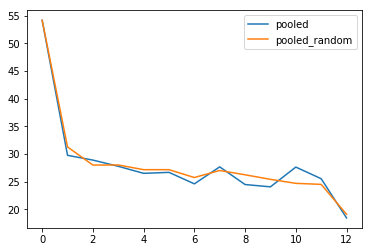

In [33]:
plt.plot(get_weekly_averages(a),label='pooled')
plt.plot(get_weekly_averages(app),label='pooled_random')
plt.legend()
plt.savefig('with_seeds')